In [13]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import json
import numpy as np

In [2]:
glove2word2vec("./glove.6B/glove.6B.300d.txt", "./glove_model2.txt")


/var/folders/6l/3d7jmg7d6h942bjz6t9qqjzr0000gn/T/ipykernel_97904/1740800683.py:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec("./glove.6B/glove.6B.300d.txt", "./glove_model2.txt")


(400000, 300)

In [15]:
word_groups_by_cat = json.load(open("reversed_word_map.json", encoding="utf-8"))

word_groups = []

for group in word_groups_by_cat:
    word_groups.append([word.lower().replace(" ", "_") for word in word_groups_by_cat[group]])


In [5]:
word_groups

[['hail', 'rain', 'sleet', 'snow'],
 ['snow', 'carrot', 'coal', 'sticks'],
 ['bucks', 'heat', 'jazz', 'nets'],
 ['heat', 'fat', 'acid', 'salt'],
 ['jazz', 'pop', 'punk', 'rap', 'soul', 'blues', 'country', 'funk'],
 ['option', 'return', 'shift', 'tab'],
 ['option', 'bond', 'cd', 'stock'],
 ['tab', 'bookmark', 'history', 'window'],
 ['tab', 'bill', 'check', 'invoice'],
 ['kayak', 'level', 'mom', 'race car', 'eve', 'hannah', 'natan', 'otto'],
 ['level', 'hammer', 'saw', 'file'],
 ['level', 'even', 'stable', 'steady'],
 ['boot', 'loafer', 'pump', 'sneaker'],
 ['boot', 'iron', 'thimble', 'top hat'],
 ['loafer', 'croc', 'moccasin', 'slipper'],
 ['pump', 'clog', 'slide', 'wedge'],
 ['pump', 'fire', 'amp', 'hype'],
 ['foot', 'foot', 'league', 'mile', 'mile', 'yard', 'yard', 'inch'],
 ['foot', 'base', 'bottom', 'foundation'],
 ['essence',
  'people',
  'time',
  'us',
  'us',
  'fortune',
  'rolling stone',
  'vogue',
  'wired',
  'w',
  'o',
  'ok'],
 ['essence', 'spirit', 'heart', 'soul'],
 [

In [6]:
pretrained_path = "./glove_model2.txt"
pretrained_model = KeyedVectors.load_word2vec_format(pretrained_path, binary=False)

In [16]:
model = Word2Vec(vector_size=300, min_count=1)
model.build_vocab([list(pretrained_model.key_to_index.keys())])
model.build_vocab(word_groups, update=True)

In [19]:
len(pretrained_model.key_to_index), len(model.wv.key_to_index)

(400000, 400040)

In [23]:
model.train(word_groups, total_examples=len(word_groups), epochs=model.epochs)

(41920, 41920)

In [33]:
# available_words = ["okay", "couch", "foot", "mole", "intimate", "sleeper", "kelvin", "verse", "suggest", "thousand", "line", "asset", "meter", "agent", "potassium", "imply"]
available_words = ['WAVE',
 'DANCE',
 'SEA',
 'CAVE',
 'TON',
 'BUCKLE',
 'FLOP',
 'SNAP',
 'BUTTON',
 'WHISTLE',
 'MASS',
 'SHOUT',
 'GIVE',
 'LAUGH',
 'COLLAPSE',
 'SLEW']
available_words = [word.lower().replace(" ", "_") for word in available_words]

In [106]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

available_words_vectors = np.array([model.wv[word] for word in available_words])

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(available_words_vectors)

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
# Fit on the cosine similarity matrix instead of the word vectors directly
kmeans.fit(cosine_sim_matrix)
labels = kmeans.labels_

clustered_words = {i: [] for i in range(num_clusters)}
for i, word in enumerate(available_words):
    clustered_words[labels[i]].append(word)

clustered_words


/Users/weijiang/anaconda3/envs/gensim/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: ['wave', 'mass', 'slew'],
 1: ['buckle', 'snap', 'button', 'shout', 'give', 'collapse'],
 2: ['sea', 'cave', 'ton', 'laugh'],
 3: ['dance', 'flop', 'whistle']}

In [64]:
from sklearn.cluster import SpectralClustering

# Assuming available_words_vectors is your data matrix
num_clusters = 4
spectral = SpectralClustering(n_clusters=num_clusters, assign_labels='discretize', random_state=0)
labels = spectral.fit_predict(available_words_vectors)

clustered_words = {i: [] for i in range(num_clusters)}
for i, word in enumerate(available_words):
    clustered_words[labels[i]].append(word)

print(clustered_words)

{0: ['cave', 'ton', 'mass', 'laugh', 'slew'], 1: ['sea', 'button', 'shout', 'give', 'collapse'], 2: ['wave', 'flop', 'whistle'], 3: ['dance', 'buckle', 'snap']}


In [79]:
from sklearn.cluster import AgglomerativeClustering

# Assuming available_words_vectors is your data matrix
num_clusters = 4
hac = AgglomerativeClustering(n_clusters=num_clusters)
labels = hac.fit_predict(available_words_vectors)

clustered_words = {i: [] for i in range(num_clusters)}
for i, word in enumerate(available_words):
    clustered_words[labels[i]].append(word)

print(clustered_words)


{0: ['dance', 'sea', 'flop', 'whistle', 'mass', 'shout'], 1: ['buckle', 'button', 'give', 'collapse'], 2: ['wave', 'cave', 'ton', 'laugh', 'slew'], 3: ['snap']}


In [104]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(available_words_vectors)

# Use Agglomerative Clustering with precomputed affinity (cosine similarity)
num_clusters = 4
hac_cosine = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', linkage='average')
labels = hac_cosine.fit_predict(1 - cosine_sim_matrix)  # 1 - cosine similarity to get distance

clustered_words_cosine = {i: [] for i in range(num_clusters)}
for i, word in enumerate(available_words):
    clustered_words_cosine[labels[i]].append(word)

print(clustered_words_cosine)


{0: ['wave', 'dance', 'flop', 'whistle'], 1: ['cave', 'ton', 'laugh', 'slew'], 2: ['buckle', 'snap', 'button', 'give', 'collapse'], 3: ['sea', 'mass', 'shout']}


/Users/weijiang/anaconda3/envs/gensim/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [80]:
from sklearn.manifold import TSNE

# Applying t-SNE to project vectors into 2 dimensions
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
vectors_2d = tsne.fit_transform(available_words_vectors)

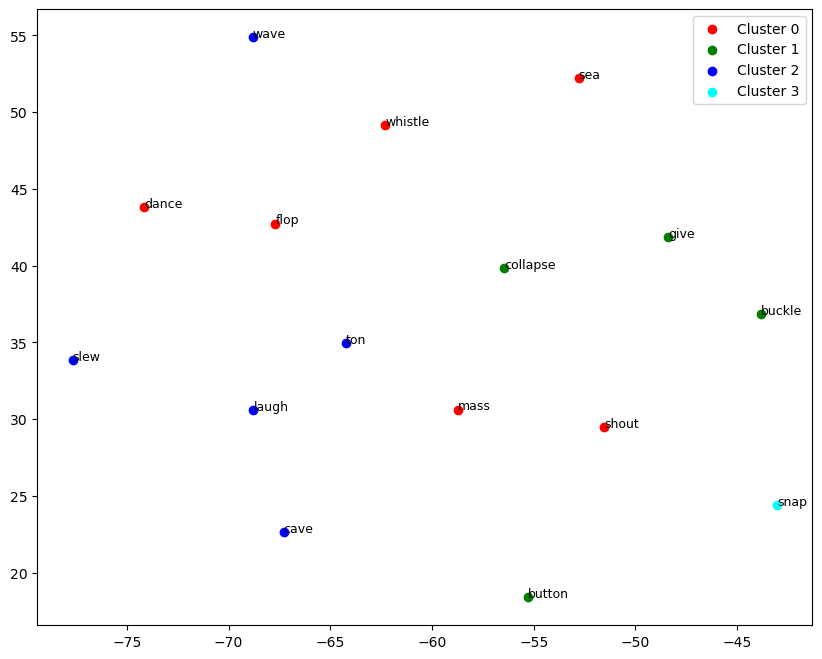

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Define colors for each cluster
colors = ['red', 'green', 'blue', 'cyan']  # Adjust or extend colors as needed

for cluster_id in np.unique(cluster_ids):
    # Select indices of points in the current cluster
    idx = np.where(cluster_ids == cluster_id)
    # Plot points belonging to the same cluster with the same color
    plt.scatter(vectors_2d[idx, 0], vectors_2d[idx, 1], label=f'Cluster {cluster_id}', color=colors[cluster_id])

# Optionally, add annotations (words) to the points
for i, word in enumerate(available_words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=9)

plt.legend()
plt.show()

In [108]:

while any(len(cluster) > 4 for cluster in clustered_words.values()):
    for cluster in clustered_words:
        if len(clustered_words[cluster]) > 4:
            print(clustered_words[cluster])
            odd = model.wv.doesnt_match(clustered_words[cluster])
            print(odd)
            clustered_words[cluster].remove(odd)


['buckle', 'snap', 'button', 'shout', 'give', 'collapse']
shout
['buckle', 'snap', 'button', 'give', 'collapse']
snap


In [109]:
clustered_words

{0: ['wave', 'mass', 'slew'],
 1: ['buckle', 'button', 'give', 'collapse'],
 2: ['sea', 'cave', 'ton', 'laugh'],
 3: ['dance', 'flop', 'whistle']}